#  Training Deep Neural Networks

### Import Libraries

In [5]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### Vanishing/Exploding Gradients Problem

In [6]:
def logit(z):
    return 1 / (1 + np.exp(-z))

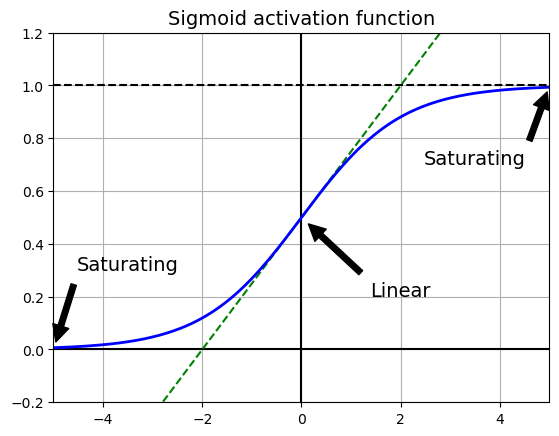

In [7]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

### Xavier and He Initialization

In [8]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [9]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [10]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

### Nonsaturating Activation Functions

#### Leaky ReLU

In [11]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

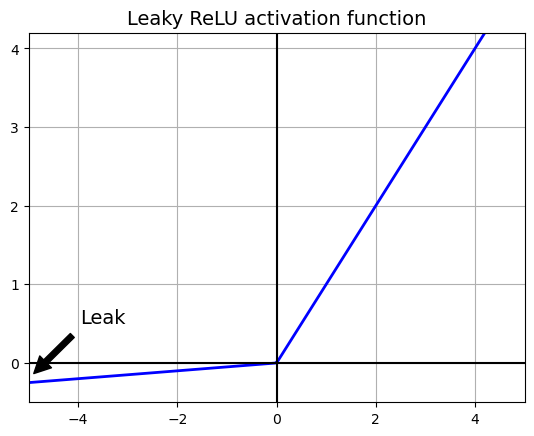

In [12]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [13]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [14]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [15]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [16]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

2023-10-04 15:20:15.179409: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3188 - accuracy: 0.6030 - val_loss: 0.8760 - val_accuracy: 0.7216
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7913 - accuracy: 0.7357 - val_loss: 0.7112 - val_accuracy: 0.7614
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6838 - accuracy: 0.7682 - val_loss: 0.6461 - val_accuracy: 0.7872
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6264 - accuracy: 0.7891 - val_loss: 0.5947 - val_accuracy: 0.8020
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5886 - accuracy: 0.8019 - val_loss: 0.5637 - val_accuracy: 0.8112
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5611 - accuracy: 0.8098 - val_loss: 0.5411 - val_accuracy: 0.8206
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5403 - accuracy: 0.8168 - val_loss: 0.5217 - val_accuracy:

In [19]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.2949 - accuracy: 0.6256 - val_loss: 0.8758 - val_accuracy: 0.7308
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7843 - accuracy: 0.7525 - val_loss: 0.6934 - val_accuracy: 0.7814
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6684 - accuracy: 0.7861 - val_loss: 0.6268 - val_accuracy: 0.8008
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6104 - accuracy: 0.8015 - val_loss: 0.5751 - val_accuracy: 0.8156
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5738 - accuracy: 0.8107 - val_loss: 0.5454 - val_accuracy: 0.8252
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5479 - accuracy: 0.8165 - val_loss: 0.5240 - val_accuracy: 0.8314
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5284 - accuracy: 0.8215 - val_loss: 0.5064 - val_accuracy:

#### ELU

In [22]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

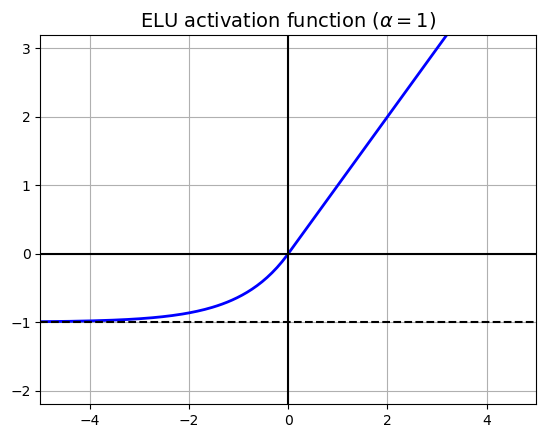

In [23]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [24]:
keras.layers.Dense(10, activation="elu")

#### SELU

In [25]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [26]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

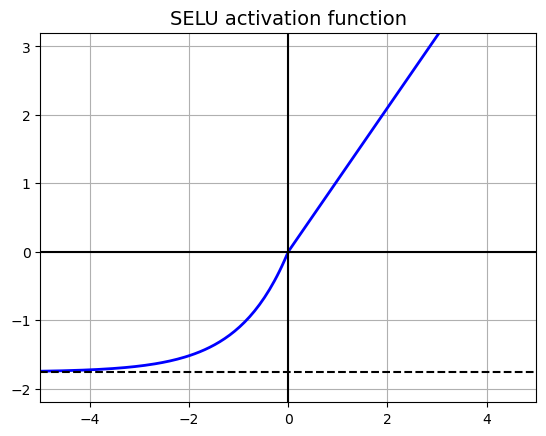

In [27]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [28]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [29]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [30]:
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [33]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [34]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 25s 13ms/step - loss: 1.0357 - accuracy: 0.6099 - val_loss: 0.8314 - val_accuracy: 0.6758
Epoch 2/5
1719/1719 [==============================] - 23s 13ms/step - loss: 0.6786 - accuracy: 0.7539 - val_loss: 0.5733 - val_accuracy: 0.8022
Epoch 3/5
1719/1719 [==============================] - 25s 14ms/step - loss: 0.5542 - accuracy: 0.8030 - val_loss: 0.6360 - val_accuracy: 0.7726
Epoch 4/5
1719/1719 [==============================] - 26s 15ms/step - loss: 0.4987 - accuracy: 0.8259 - val_loss: 0.4968 - val_accuracy: 0.8302
Epoch 5/5
1719/1719 [==============================] - 28s 16ms/step - loss: 0.4812 - accuracy: 0.8330 - val_loss: 0.4523 - val_accuracy: 0.8518


In [35]:
np.random.seed(42)
tf.random.set_seed(42)

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [38]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 21s 11ms/step - loss: 1.9770 - accuracy: 0.2108 - val_loss: 1.5275 - val_accuracy: 0.3624
Epoch 2/5
1719/1719 [==============================] - 21s 12ms/step - loss: 1.2436 - accuracy: 0.4658 - val_loss: 1.2116 - val_accuracy: 0.4798
Epoch 3/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.9461 - accuracy: 0.6192 - val_loss: 0.9018 - val_accuracy: 0.6576
Epoch 4/5
1719/1719 [==============================] - 25s 14ms/step - loss: 0.7628 - accuracy: 0.6963 - val_loss: 0.7025 - val_accuracy: 0.7274
Epoch 5/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.7229 - accuracy: 0.7139 - val_loss: 0.7145 - val_accuracy: 0.7134


### Batch Normalization

#### Implementing Batch Normalization with Keras

In [39]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_212 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_213 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [41]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [42]:
#bn1.updates #deprecated

In [43]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [44]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8376 - accuracy: 0.7170 - val_loss: 0.5523 - val_accuracy: 0.8144
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5700 - accuracy: 0.8010 - val_loss: 0.4746 - val_accuracy: 0.8396
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5144 - accuracy: 0.8194 - val_loss: 0.4420 - val_accuracy: 0.8532
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4771 - accuracy: 0.8322 - val_loss: 0.4206 - val_accuracy: 0.8584
Epoch 5/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4530 - accuracy: 0.8402 - val_loss: 0.4044 - val_accuracy: 0.8614
Epoch 6/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4370 - accuracy: 0.8450 - val_loss: 0.3927 - val_accuracy: 0.8658
Epoch 7/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4219 - accuracy: 0.8504 - val_loss: 0.3824 - val_acc

In [45]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [46]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [47]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.0481 - accuracy: 0.6749 - val_loss: 0.6762 - val_accuracy: 0.7874
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6712 - accuracy: 0.7852 - val_loss: 0.5571 - val_accuracy: 0.8204
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5913 - accuracy: 0.8055 - val_loss: 0.5016 - val_accuracy: 0.8364
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5415 - accuracy: 0.8193 - val_loss: 0.4690 - val_accuracy: 0.8452
Epoch 5/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.5070 - accuracy: 0.8266 - val_loss: 0.4460 - val_accuracy: 0.8526
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4852 - accuracy: 0.8339 - val_loss: 0.4280 - val_accuracy: 0.8564
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4681 - accuracy: 0.8393 - val_loss: 0.4145 - val_accuracy:

### Gradient Clipping

In [48]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [49]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

### Reusing Pretrained Layers

In [50]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [51]:
X_train_A.shape

(43986, 28, 28)

In [54]:
X_train_B.shape

(200, 28, 28)

In [55]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [56]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [57]:
tf.random.set_seed(42)
np.random.seed(42)

In [58]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [59]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [60]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 10s 7ms/step - loss: 0.6244 - accuracy: 0.8100 - val_loss: 0.4051 - val_accuracy: 0.8650
Epoch 2/20
1375/1375 [==============================] - 9s 7ms/step - loss: 0.3605 - accuracy: 0.8785 - val_loss: 0.3346 - val_accuracy: 0.8874
Epoch 3/20
1375/1375 [==============================] - 10s 7ms/step - loss: 0.3202 - accuracy: 0.8896 - val_loss: 0.3056 - val_accuracy: 0.8946
Epoch 4/20
1375/1375 [==============================] - 10s 7ms/step - loss: 0.2987 - accuracy: 0.8985 - val_loss: 0.2911 - val_accuracy: 0.9021
Epoch 5/20
1375/1375 [==============================] - 10s 8ms/step - loss: 0.2844 - accuracy: 0.9034 - val_loss: 0.2784 - val_accuracy: 0.9048
Epoch 6/20
1375/1375 [==============================] - 11s 8ms/step - loss: 0.2738 - accuracy: 0.9074 - val_loss: 0.2721 - val_accuracy: 0.9086
Epoch 7/20
1375/1375 [==============================] - 11s 8ms/step - loss: 0.2652 - accuracy: 0.9099 - val_loss: 0.2721 - val_acc

In [61]:
model_A.save("my_model_A.h5")

In [62]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [65]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [66]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 43ms/step - loss: 0.4454 - accuracy: 0.8300 - val_loss: 0.3648 - val_accuracy: 0.8742
Epoch 2/20
7/7 [==============================] - 3s 441ms/step - loss: 0.3013 - accuracy: 0.9500 - val_loss: 0.3024 - val_accuracy: 0.9118
Epoch 3/20
7/7 [==============================] - 0s 36ms/step - loss: 0.2457 - accuracy: 0.9550 - val_loss: 0.2624 - val_accuracy: 0.9331
Epoch 4/20
7/7 [==============================] - 0s 52ms/step - loss: 0.2092 - accuracy: 0.9700 - val_loss: 0.2315 - val_accuracy: 0.9462
Epoch 5/20
7/7 [==============================] - 0s 37ms/step - loss: 0.1811 - accuracy: 0.9800 - val_loss: 0.2086 - val_accuracy: 0.9513
Epoch 6/20
7/7 [==============================] - 0s 43ms/step - loss: 0.1592 - accuracy: 0.9800 - val_loss: 0.1907 - val_accuracy: 0.9564
Epoch 7/20
7/7 [==============================] - 0s 34ms/step - loss: 0.1432 - accuracy: 0.9850 - val_loss: 0.1766 - val_accuracy: 0.9615
Epoch 8/20
7/7 [==========

In [67]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_224 (Dense)           (None, 300)               235500    
                                                                 
 dense_225 (Dense)           (None, 100)               30100     
                                                                 
 dense_226 (Dense)           (None, 50)                5050      
                                                                 
 dense_227 (Dense)           (None, 50)                2550      
                                                                 
 dense_228 (Dense)           (None, 50)                2550      
                                                                 
 dense_229 (Dense)           (None, 1)                

In [68]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [69]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [70]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [71]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 36ms/step - loss: 1.9405 - accuracy: 0.0400 - val_loss: 1.8198 - val_accuracy: 0.0974
Epoch 2/4
7/7 [==============================] - 0s 16ms/step - loss: 1.7528 - accuracy: 0.0600 - val_loss: 1.6490 - val_accuracy: 0.1217
Epoch 3/4
7/7 [==============================] - 0s 17ms/step - loss: 1.5788 - accuracy: 0.0800 - val_loss: 1.4955 - val_accuracy: 0.1673
Epoch 4/4
7/7 [==============================] - 0s 18ms/step - loss: 1.4233 - accuracy: 0.1350 - val_loss: 1.3580 - val_accuracy: 0.2120
Epoch 1/16
7/7 [==============================] - 1s 36ms/step - loss: 1.0787 - accuracy: 0.2750 - val_loss: 0.8006 - val_accuracy: 0.4838
Epoch 2/16
7/7 [==============================] - 0s 21ms/step - loss: 0.6446 - accuracy: 0.6050 - val_loss: 0.5411 - val_accuracy: 0.7181
Epoch 3/16
7/7 [==============================] - 0s 36ms/step - loss: 0.4374 - accuracy: 0.7850 - val_loss: 0.4053 - val_accuracy: 0.8418
Epoch 4/16
7/7 [===============

In [72]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0916 - accuracy: 0.9840


[0.09161117672920227, 0.984000027179718]

In [73]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0954 - accuracy: 0.9825


[0.09540771692991257, 0.9825000166893005]

In [74]:
(100 - 97.05) / (100 - 99.40)

4.916666666666718

### Faster Optimizer